['merged_path', 'sample_idx', 'ori_merged_shape', 'gt_merged', 'coarse_masks', 'gt_alpha', 'fine_masks']
['merged_path', 'sample_idx', 'ori_merged_shape', 'gt_merged', 'coarse_masks', 'gt_alpha', 'fine_masks']
['merged_path', 'sample_idx', 'ori_merged_shape', 'gt_merged', 'coarse_masks', 'gt_alpha', 'fine_masks']


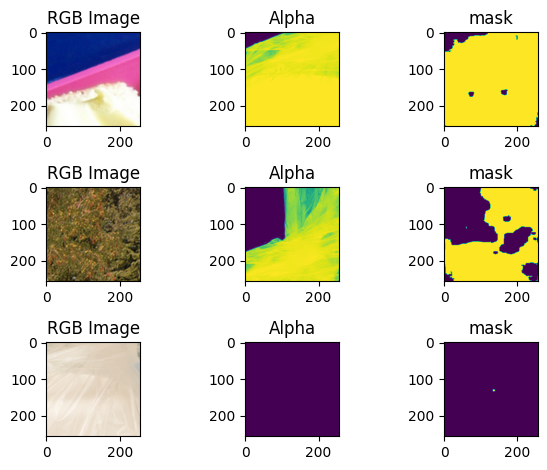

In [12]:
from mmagic.registry import DATASETS,MODELS
from mmengine.config import Config
from mmengine.registry import init_default_scope
import matplotlib.pyplot as plt
import numpy as np

cfg = Config.fromfile('configs\matrefiner\mat_diffusion_xxx-10k_comp1k.py')

init_default_scope(cfg.get('default_scope', 'mmagic'))
# 数据的构建
dataset = DATASETS.build(cfg.train_dataloader.dataset)
# 模型的构建
model = MODELS.build(cfg.model)
# 创建一个2x2的子图布局
fig, axes = plt.subplots(3, 3)
for i in range(3):
   item=dataset[i]

   img = item['inputs'].permute(1, 2, 0).numpy()
   data_sample = item['data_samples'].numpy()
   print(data_sample.all_keys())
   img = np.transpose(data_sample.gt_merged, (1, 2, 0))[:, :, ::-1]/255
   img1 = np.transpose(data_sample.gt_alpha, (1, 2, 0))[:, :, ::-1]
   img2 = np.transpose(data_sample.coarse_masks, (1, 2, 0))[:, :, ::-1]

   # 在第一个子图中显示RGB图像
   axes[i, 0].imshow(img)
   axes[i, 0].set_title('RGB Image')

   # 在第二个子图中显示单通道图像
   axes[i, 1].imshow(img1)
   axes[i, 1].set_title('Alpha')

      # 在第二个子图中显示单通道图像
   axes[i, 2].imshow(img2)
   axes[i, 2].set_title('mask')

   # 调整子图之间的间距
   plt.tight_layout()
plt.show()

In [13]:
# 数据遍历测试
for i in range(2000):
   item=dataset[i]

   img = item['inputs'].permute(1, 2, 0).numpy()
   data_sample = item['data_samples'].numpy()
   print(i)
   img = np.transpose(data_sample.gt_merged, (1, 2, 0))[:, :, ::-1]/255
   img1 = np.transpose(data_sample.gt_alpha, (1, 2, 0))[:, :, ::-1]
   img2 = np.transpose(data_sample.coarse_masks, (1, 2, 0))[:, :, ::-1]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121


KeyboardInterrupt: 

In [2]:
from mmengine.runner import Runner

runner = Runner.from_cfg(cfg)

04/04 16:31:00 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: win32
    Python: 3.8.19 | packaged by conda-forge | (default, Mar 20 2024, 12:38:07) [MSC v.1929 64 bit (AMD64)]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 1852920860
    GPU 0: NVIDIA GeForce RTX 4070 Ti SUPER
    CUDA_HOME: C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v12.1
    NVCC: Cuda compilation tools, release 12.1, V12.1.105
    MSVC: n/a, reason: fileno
    PyTorch: 2.2.2
    PyTorch compiling details: PyTorch built with:
  - C++ Version: 201703
  - MSVC 192930151
  - Intel(R) Math Kernel Library Version 2020.0.2 Product Build 20200624 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.3.2 (Git Hash 2dc95a2ad0841e29db8b22fbccaf3e5da7992b01)
  - OpenMP 2019
  - LAPACK is enabled (usually provided by MKL)
  - CPU capability usage: AVX2
  - CUDA Runtime 12.1
  - NVCC architecture flags: -gencode

In [3]:
runner.train()

04/04 16:31:26 - mmengine - WARNING - The prefix is not set in metric class GradientError.
04/04 16:31:26 - mmengine - WARNING - The prefix is not set in metric class ConnectivityError.
04/04 16:31:27 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
04/04 16:31:27 - mmengine - WARNING - "HardDiskBackend" is the alias of "LocalBackend" and the former will be deprecated in future.
04/04 16:31:27 - mmengine - INFO - Checkpoints will be saved to ./work_dirs\mat_diffusion_xxx-10k_comp1k.
04/04 16:31:32 - mmengine - WARNING - Cannot convert inputs with 'single' channel order to 'output_channel_order' (RGB). Return without conversion.


OutOfMemoryError: CUDA out of memory. Tried to allocate 512.00 MiB. GPU 0 has a total capacity of 15.99 GiB of which 0 bytes is free. Of the allocated memory 29.87 GiB is allocated by PyTorch, and 176.03 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)